In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('country_comparison_large_dataset.csv')
df.head(1)

Country  Year  GDP (in Trillions USD)  GDP per Capita (in USD)  \
0     USA  2000                   20.87                  65455.0   

   Inflation Rate (%)  Population (in Millions)  Population Growth Rate (%)  \
0                2.28                    330.34                        0.58   

   Urban Population (%)  Life Expectancy (Years)  \
0                 83.42                    78.39   

   Healthcare Expenditure per Capita (USD)  ...  Poverty Rate (%)  \
0                                  11209.0  ...             10.98   

   Number of International Visitors (in Millions)  \
0                                            80.8   

   Tourism Revenue (in Billion USD)  Agricultural Land (%)  \
0                            210.98                  42.37   

   Unemployment Rate (%)  Labor Force Participation Rate (%)  \
0                   3.55                               65.52   

   Crime Rate (per 100,000)  Corruption Perception Index  \
0                     287.4                        67.41   

   Freedom of Press Index  Voting Participation Rate (%)  
0                   45.27                          68.81  

[1 rows x 36 columns]

In [13]:
for i in df.columns:
    print(i)

Country
Year
GDP (in Trillions USD)
GDP per Capita (in USD)
Inflation Rate (%)
Population (in Millions)
Population Growth Rate (%)
Urban Population (%)
Life Expectancy (Years)
Healthcare Expenditure per Capita (USD)
Doctor-to-Patient Ratio
Literacy Rate (%)
Education Expenditure as % of GDP
Internet Penetration (%)
Smartphone Adoption (%)
Energy Consumption (TWh)
Renewable Energy Share (%)
Military Expenditure (in Billion USD)
Number of Active Military Personnel
CO2 Emissions (Million Metric Tons)
Forest Coverage (%)
Number of Airports
Road Network Length (in km)
Public Transport Usage (%)
Human Development Index (HDI)
Gender Equality Index
Poverty Rate (%)
Number of International Visitors (in Millions)
Tourism Revenue (in Billion USD)
Agricultural Land (%)
Unemployment Rate (%)
Labor Force Participation Rate (%)
Crime Rate (per 100,000)
Corruption Perception Index
Freedom of Press Index
Voting Participation Rate (%)


Lets do something different this time

### Things to do:

* Week 2 - Coloring and customizing **Check**
* Week 3 - IDA, Visualization, Narratives **Check**
* Week 4 - IDA-EDA **Check**
* Week 5 - Missingness
* Week 6 - Imputation

### Rubric Requirements:

* Use at least 2 distinct data sources **Check**
* Data Cleaning **Check**
* Data Type and Encoding **Check**
* 3 Types of Visualizations **Check**
* Basic Statistical Summaries **Check**
* Appropriate Encoding Usage **IP**
* Implement missingness handling **IP**
* Implement imputing **IP**
* Create a Streamlit env
* Add basic documentation
* Deploy to make it available online
* GitHub
* ReadME

### Above and Beyond:

For another day

In [153]:
working_df = df.copy()

#### Statistics

In [19]:
def stats(df):
    print(df.shape, end='\n-----\n')

    print(df.isna().sum(), end='\n-----\n')

    for i in range(1,5):
        x = sum(df.isna().sum(axis=1)>i)
        print(f'There are {x} rows with atleast {i+1} empty columns.', end='')
        if x==0:
            break
        print('')
    print('\n-----\n', end='')

    print('There are ' + str(df.duplicated().sum()) + ' duplicate row(s).', end='\n-----\n')
    
    print(df.info(), end='\n-----\n')

    print(df.describe(), end='\n-----\n')

stats(df)

for i in ['Country','Year']:
    print(i, end='\n\n')
    print(df[i].value_counts(), end='\n-----\n')

(144, 36)
-----
Country                                           0
Year                                              0
GDP (in Trillions USD)                            0
GDP per Capita (in USD)                           0
Inflation Rate (%)                                0
Population (in Millions)                          0
Population Growth Rate (%)                        0
Urban Population (%)                              0
Life Expectancy (Years)                           0
Healthcare Expenditure per Capita (USD)           0
Doctor-to-Patient Ratio                           0
Literacy Rate (%)                                 0
Education Expenditure as % of GDP                 0
Internet Penetration (%)                          0
Smartphone Adoption (%)                           0
Energy Consumption (TWh)                          0
Renewable Energy Share (%)                        0
Military Expenditure (in Billion USD)             0
Number of Active Military Personnel             

All columns are Ratios except Indexes, Year and Country.

Country is Nominal, Year is Ordinal, Indexes are Intervals


In [155]:
# Duplicate Handling - This dataset has no duplicates

df.drop_duplicates(inplace=True)

In [157]:
columns = [
    "country",
    "year",
    "gdp_trillions_usd",
    "gdp_per_capita_usd",
    "inflation_rate",
    "population_millions",
    "population_growth_rate",
    "urban_population",
    "life_expectancy_years",
    "healthcare_expenditure_per_capita_usd",
    "doctor_to_patient_ratio",
    "literacy_rate",
    "education_expenditure_gdp",
    "internet_penetration",
    "smartphone_adoption",
    "energy_consumption_twh",
    "renewable_energy_share",
    "military_expenditure_billion_usd",
    "active_military_personnel",
    "co2_emissions_million_metric_tons",
    "forest_coverage",
    "number_of_airports",
    "road_network_length_km",
    "public_transport_usage",
    "hdi",
    "gender_equality_index",
    "poverty_rate",
    "international_visitors_millions",
    "tourism_revenue_billion_usd",
    "agricultural_land",
    "unemployment_rate",
    "labor_force_participation_rate",
    "crime_rate",
    "corruption_perception_index",
    "freedom_of_press_index",
    "voting_participation_rate"
]


working_df.columns = columns

Conducting some basic visualizations

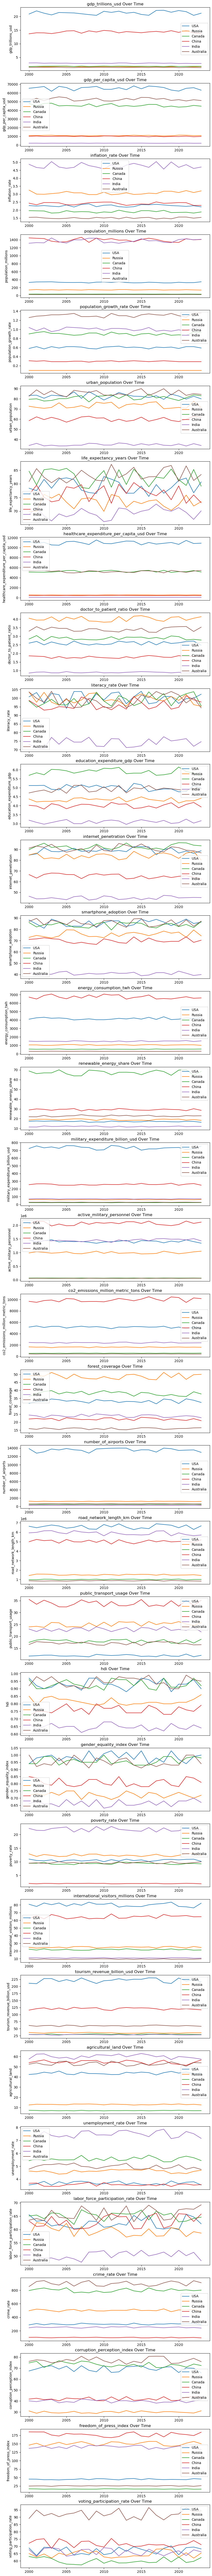

In [27]:
columns_to_plot = working_df.columns[2:]

countries = working_df['country'].unique()

num_columns = len(columns_to_plot)

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns))

for i, column in enumerate(columns_to_plot):
    for country in countries:
        country_data = working_df[working_df['country'] == country]
        axes[i].plot(country_data['year'], country_data[column], label=country)
    axes[i].set_title(f'{column} Over Time')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)
    axes[i].legend()

The graphs are interesting. Over time, the results have stayed consistent for the countries in the last two decades. 

For now, I want to drop literacy rate or modify it. I want to drop road length because I see no great insights from it

In [159]:
working_df['literacy_rate'] = working_df['literacy_rate'].clip(upper=100)

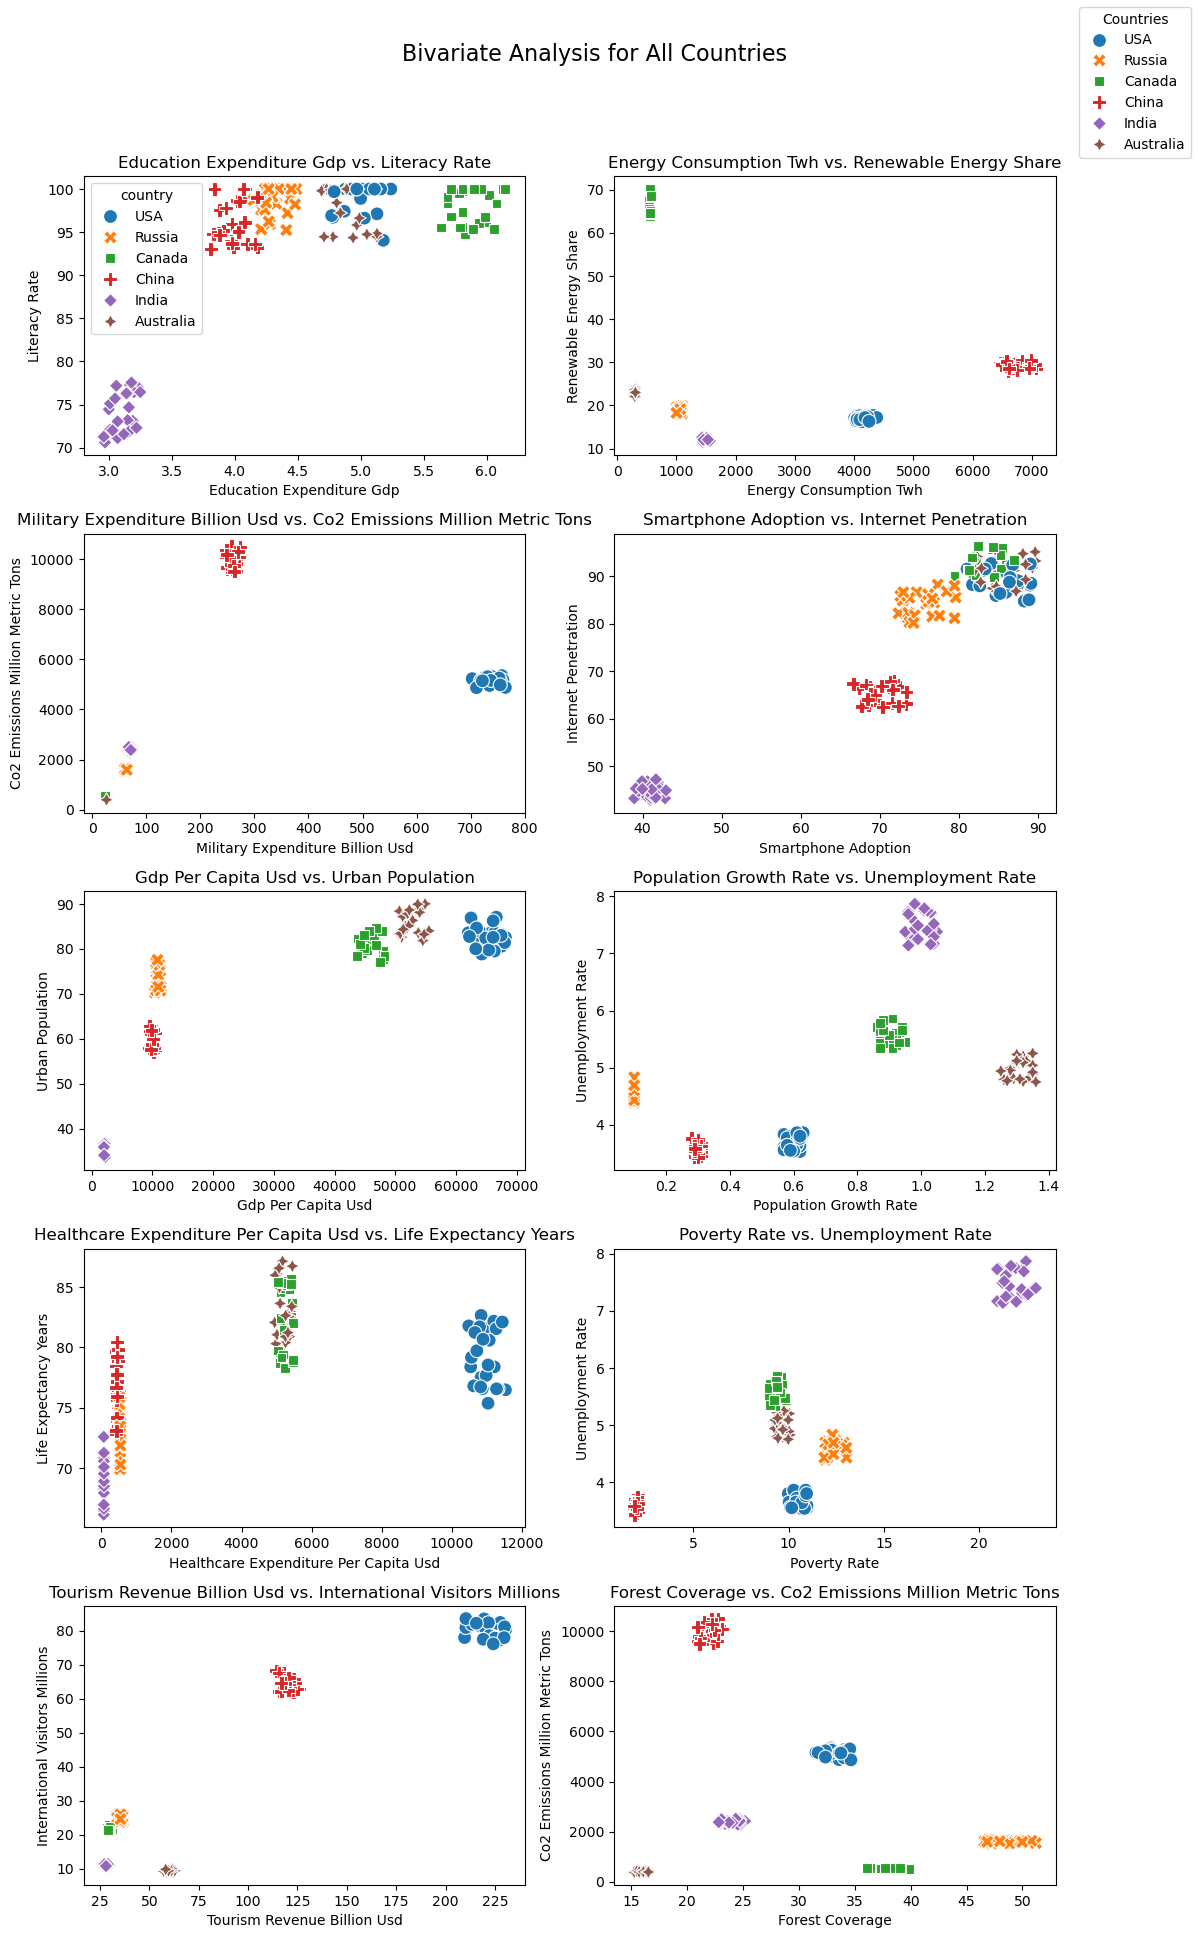

In [52]:
# working_df['ubran_pop_pct'] = working_df['urban_population']/working_df['']
bivariate_pairs = [
    ("education_expenditure_gdp", "literacy_rate"),                            # Education Expenditure vs Literacy Rate
    ("energy_consumption_twh", "renewable_energy_share"),                      # Energy Consumption vs Renewable Energy Share
    ("military_expenditure_billion_usd", "co2_emissions_million_metric_tons"), # Military Expenditure vs CO2 Emissions
    ("smartphone_adoption", "internet_penetration"),                            # Smartphone Adoption vs Internet Penetration
    ("gdp_per_capita_usd", "urban_population"),                                 # GDP per Capita vs Urban Population
    ("population_growth_rate", "unemployment_rate"),                             # Population Growth Rate vs Unemployment Rate
    ("healthcare_expenditure_per_capita_usd", "life_expectancy_years"),        # Healthcare Expenditure vs Life Expectancy
    ("poverty_rate", "unemployment_rate"),                                      # Poverty Rate vs Unemployment Rate
    ("tourism_revenue_billion_usd", "international_visitors_millions"),       # Tourism Revenue vs International Visitors
    ("forest_coverage", "co2_emissions_million_metric_tons")                   # Forest Coverage vs CO2 Emissions
]

fig, axs = plt.subplots(5, 2, figsize=(12, 20))
fig.suptitle('Bivariate Analysis for All Countries', fontsize=16)

# Loop through the pairs and plot
for i, (x_col, y_col) in enumerate(bivariate_pairs):
    # Scatter plot for all countries
    if i == 0:  # For the first plot, we create the legend
        sns.scatterplot(data=working_df, x=x_col, y=y_col, hue='country', style='country', ax=axs[i // 2, i % 2], s=100)
    else:
        sns.scatterplot(data=working_df, x=x_col, y=y_col, hue='country', style='country', ax=axs[i // 2, i % 2], s=100, legend=False)
        
    axs[i // 2, i % 2].set_title(f'{x_col.replace("_", " ").title()} vs. {y_col.replace("_", " ").title()}')
    axs[i // 2, i % 2].set_xlabel(x_col.replace("_", " ").title())
    axs[i // 2, i % 2].set_ylabel(y_col.replace("_", " ").title())

# Create a legend outside the plots
handles, labels = axs[0, 0].get_legend_handles_labels()  # Get handles from the first plot
fig.legend(handles, labels, loc='upper right', title='Countries', fontsize='medium')

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust layout to make room for the title and legend
plt.show()

Interesting stories here:

* China with C02 emissions, and Russia with high forest coverage
* US understandably winning in tourism revenue and health expenditure.
* India showing highest unemployment.
* Urban Pop and GDP being related.
* Smart Phone Adoption and Internet Usage are related.
* Russia shows greater unemployment rate despite smaller population growth. Otherwise, population growth and unemployment have a relationship

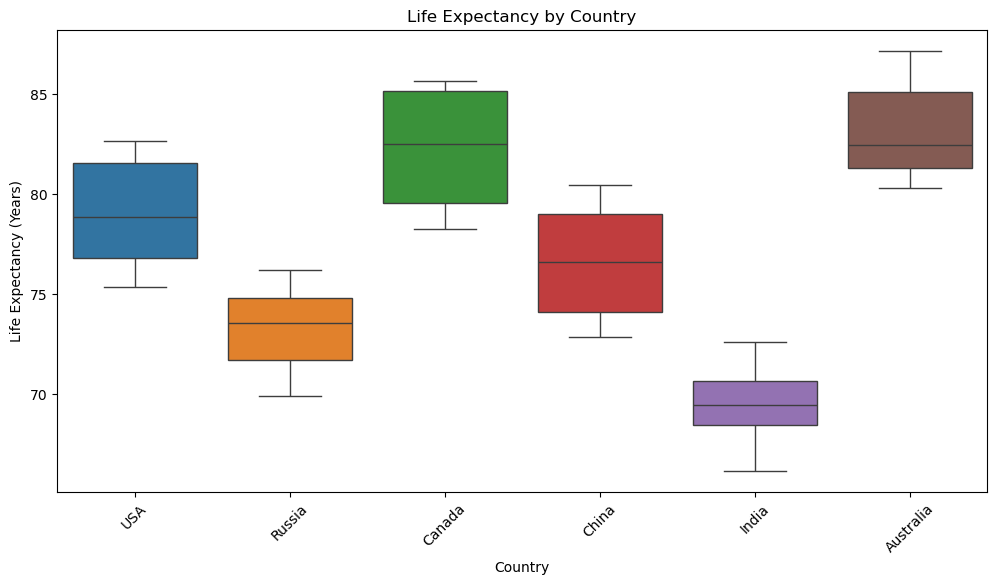

In [134]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=working_df, x='country', y='life_expectancy_years', hue='country')

plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.show()


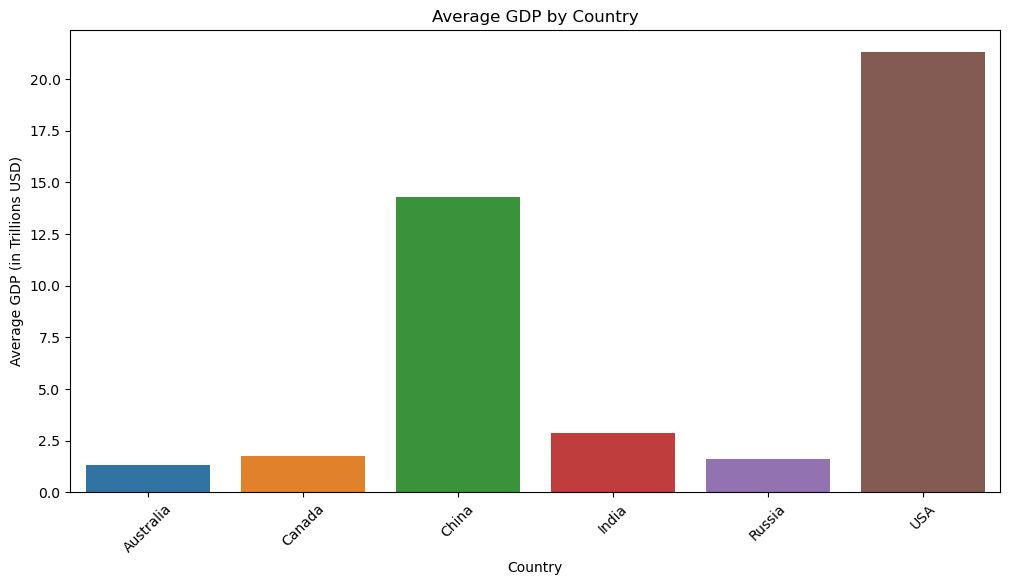

In [138]:
plt.figure(figsize=(12, 6))
average_gdp = working_df.groupby('country')['gdp_trillions_usd'].mean().reset_index()
sns.barplot(data=average_gdp, x='country', y='gdp_trillions_usd', hue='country')

plt.title('Average GDP by Country')
plt.xlabel('Country')
plt.ylabel('Average GDP (in Trillions USD)')
plt.xticks(rotation=45)
plt.show()


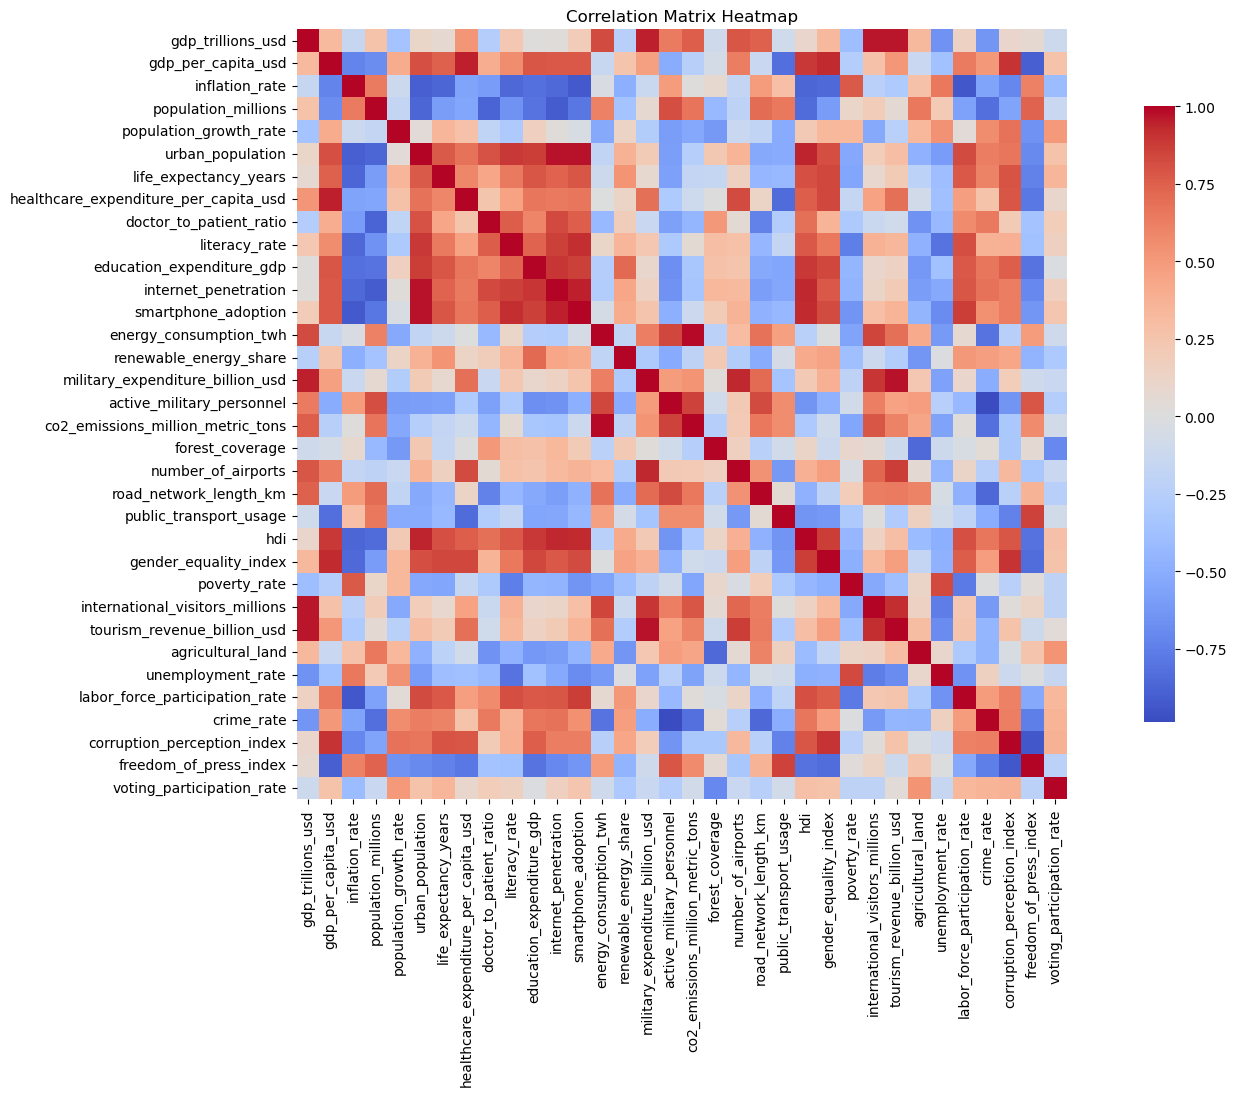

In [161]:
# Compute the correlation matrix
correlation_matrix = working_df[columns_to_plot].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix Heatmap')
plt.show()


Lets introduce some missingness

In [163]:
countries = ['India', 'China', 'Australia', 'United States of America', 'Russian Federation', 'Canada']

In [165]:
trade = pd.read_csv('Data/SYB66_123_202310_Total Imports Exports and Balance of Trade.csv', skiprows=1, header=0, encoding='latin1')
trade.drop(columns=['Footnotes', 'Source', 'System of trade footnote','System of trade'], inplace=True)
trade.columns = ['Country', 'Region', 'Year', 'Series', 'Value']
trade.drop(columns=['Country'], inplace=True)
trade = trade[trade['Region'].isin(countries)]
trade = trade[trade['Year']>=2000]
trade = trade.pivot(index=['Region', 'Year'], columns='Series', values='Value').reset_index() 
trade.drop(columns=['Balance imports/exports (millions of US dollars)'], inplace=True)
trade.head(1)

Series     Region  Year Exports FOB (millions of US dollars)  \
0       Australia  2005                              106,011   

Series Imports CIF (millions of US dollars)  
0                                   125,221

In [167]:
eco = pd.read_csv('Data/SYB66_153_202310_Gross Value Added by Economic Activity.csv', skiprows=1, header=0, encoding='latin1')
eco.drop(columns=['Footnotes', 'Source'], inplace=True)
eco.columns = ['Country', 'Region', 'Year', 'Series', 'Value']
eco.drop(columns=['Country'], inplace=True)
eco = eco[eco['Region'].isin(countries)]
eco = eco[eco['Year']>=2000]
eco = eco.pivot(index=['Region', 'Year'], columns='Series', values='Value').reset_index()
eco.head(1)

Series     Region  Year  \
0       Australia  2005   

Series  Agriculture, hunting, forestry and fishing (% of gross value added)  \
0                                                     3.0                     

Series  Industry (% of gross value added)  Services (% of gross value added)  
0                                    27.8                               69.2

We will add these two columns to our dataset - These have values only for a few years. We are going to impute the rest of it :)

In [170]:
eco['Region'] = eco['Region'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})
trade['Region'] = trade['Region'].replace({'Russian Federation': 'Russia', 'United States of America': 'USA'})
for col in trade.columns[2:]:
    if trade[col].dtype == 'object':  # Apply to object columns only
        trade[col] = pd.to_numeric(trade[col].str.replace(',', ''), errors='coerce')

In [172]:
trade.columns = ['country', 'year', 'exports_millions_usd', 'imports_millions_usd']
eco.columns = ['country', 'year', 'agriculture_hunting_forestry_fishing_pct_gross', 'industry_pct_gross', 'services_pct_gross']

In [174]:
working_df = pd.merge(working_df, trade, how = 'left', on=['country', 'year'])
working_df = pd.merge(working_df, eco, how = 'left', on=['country', 'year'])

working_df.isna().sum()

country                                             0
year                                                0
gdp_trillions_usd                                   0
gdp_per_capita_usd                                  0
inflation_rate                                      0
population_millions                                 0
population_growth_rate                              0
urban_population                                    0
life_expectancy_years                               0
healthcare_expenditure_per_capita_usd               0
doctor_to_patient_ratio                             0
literacy_rate                                       0
education_expenditure_gdp                           0
internet_penetration                                0
smartphone_adoption                                 0
energy_consumption_twh                              0
renewable_energy_share                              0
military_expenditure_billion_usd                    0
active_military_personnel   

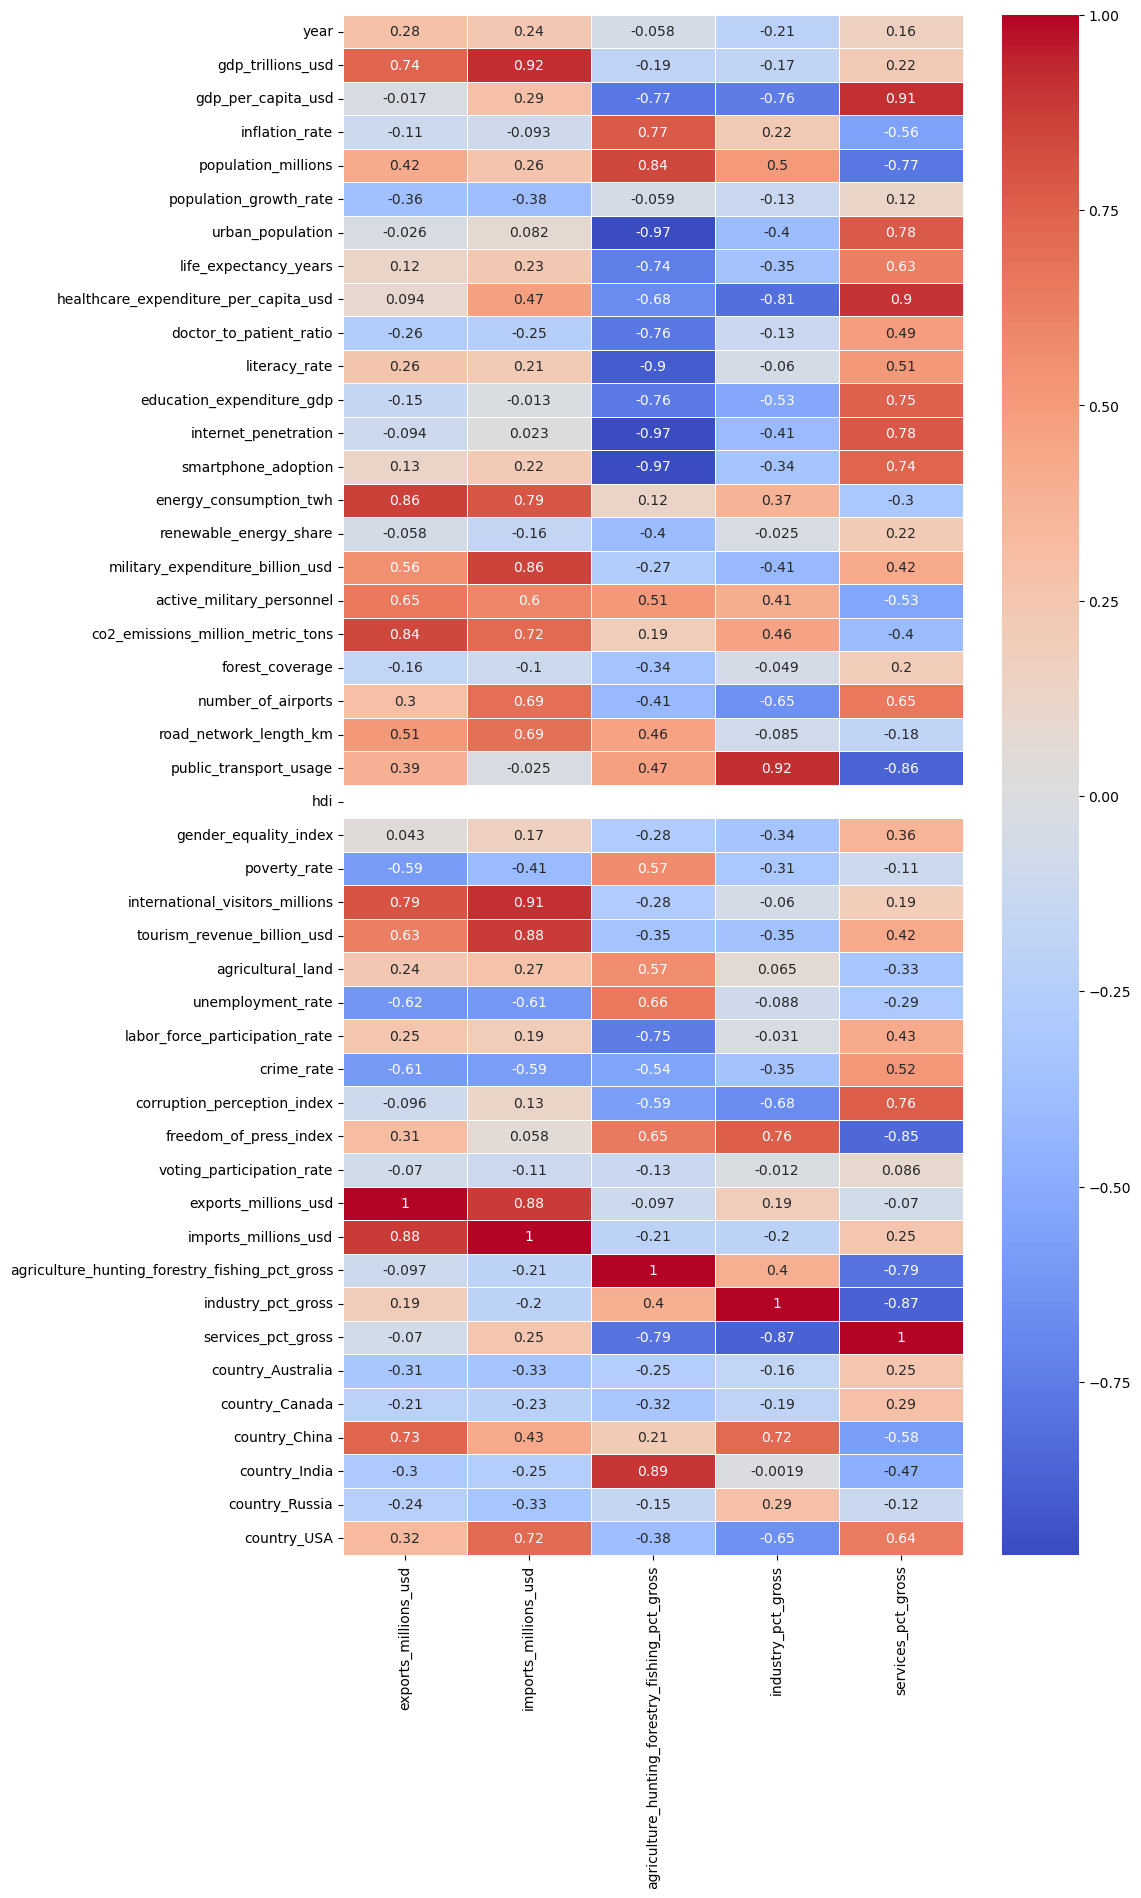

In [231]:
temp_df = pd.get_dummies(working_df, columns=['country'])
def corr_plot(working_df):
    missing_columns = [
        'exports_millions_usd', 
        'imports_millions_usd', 
        'agriculture_hunting_forestry_fishing_pct_gross', 
        'industry_pct_gross', 
        'services_pct_gross'
    ]
    
    non_missing = working_df.dropna(subset=missing_columns)
    # non_missing = pd.get_dummies(non_missing, columns=['country'])
    # non_missing = non_missing.drop(columns=['country'])
    non_missing = non_missing.astype(int)
    non_missing
    plt.figure(figsize=(10,20))
    corr_data = non_missing.corr().loc[missing_columns].T
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=0.5)

    return corr_data
    # plt.xticks(rotation=45)
    # plt.gca().xaxis.tick_top()
    plt.title('Correlation Heatmap of Non-Missing Data')
    plt.show()

corr_data_original = corr_plot(temp_df)

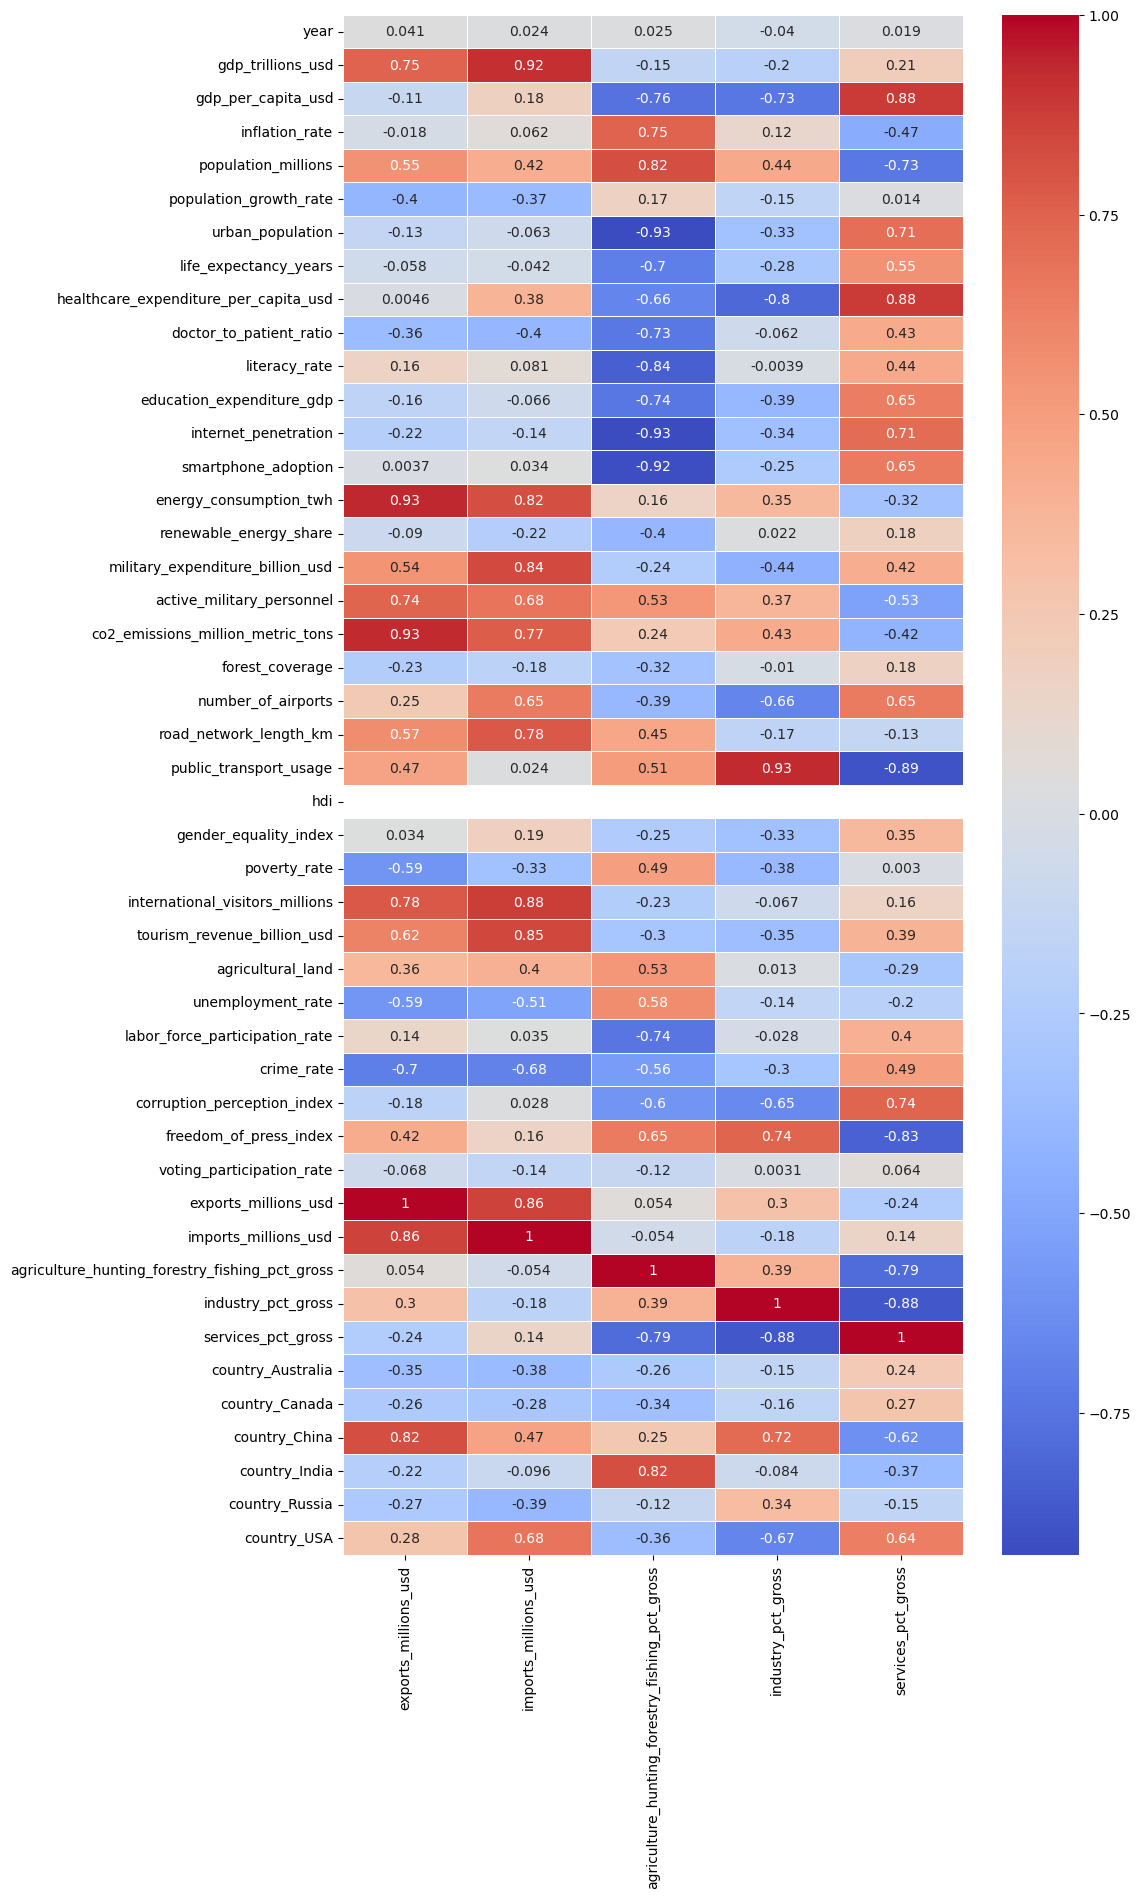

In [300]:
from sklearn.impute import KNNImputer

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputation
df_imputed_knn = pd.DataFrame(imputer.fit_transform(temp_df), columns=temp_df.columns)

corr_data_knn = corr_plot(df_imputed_knn)

<Axes: >

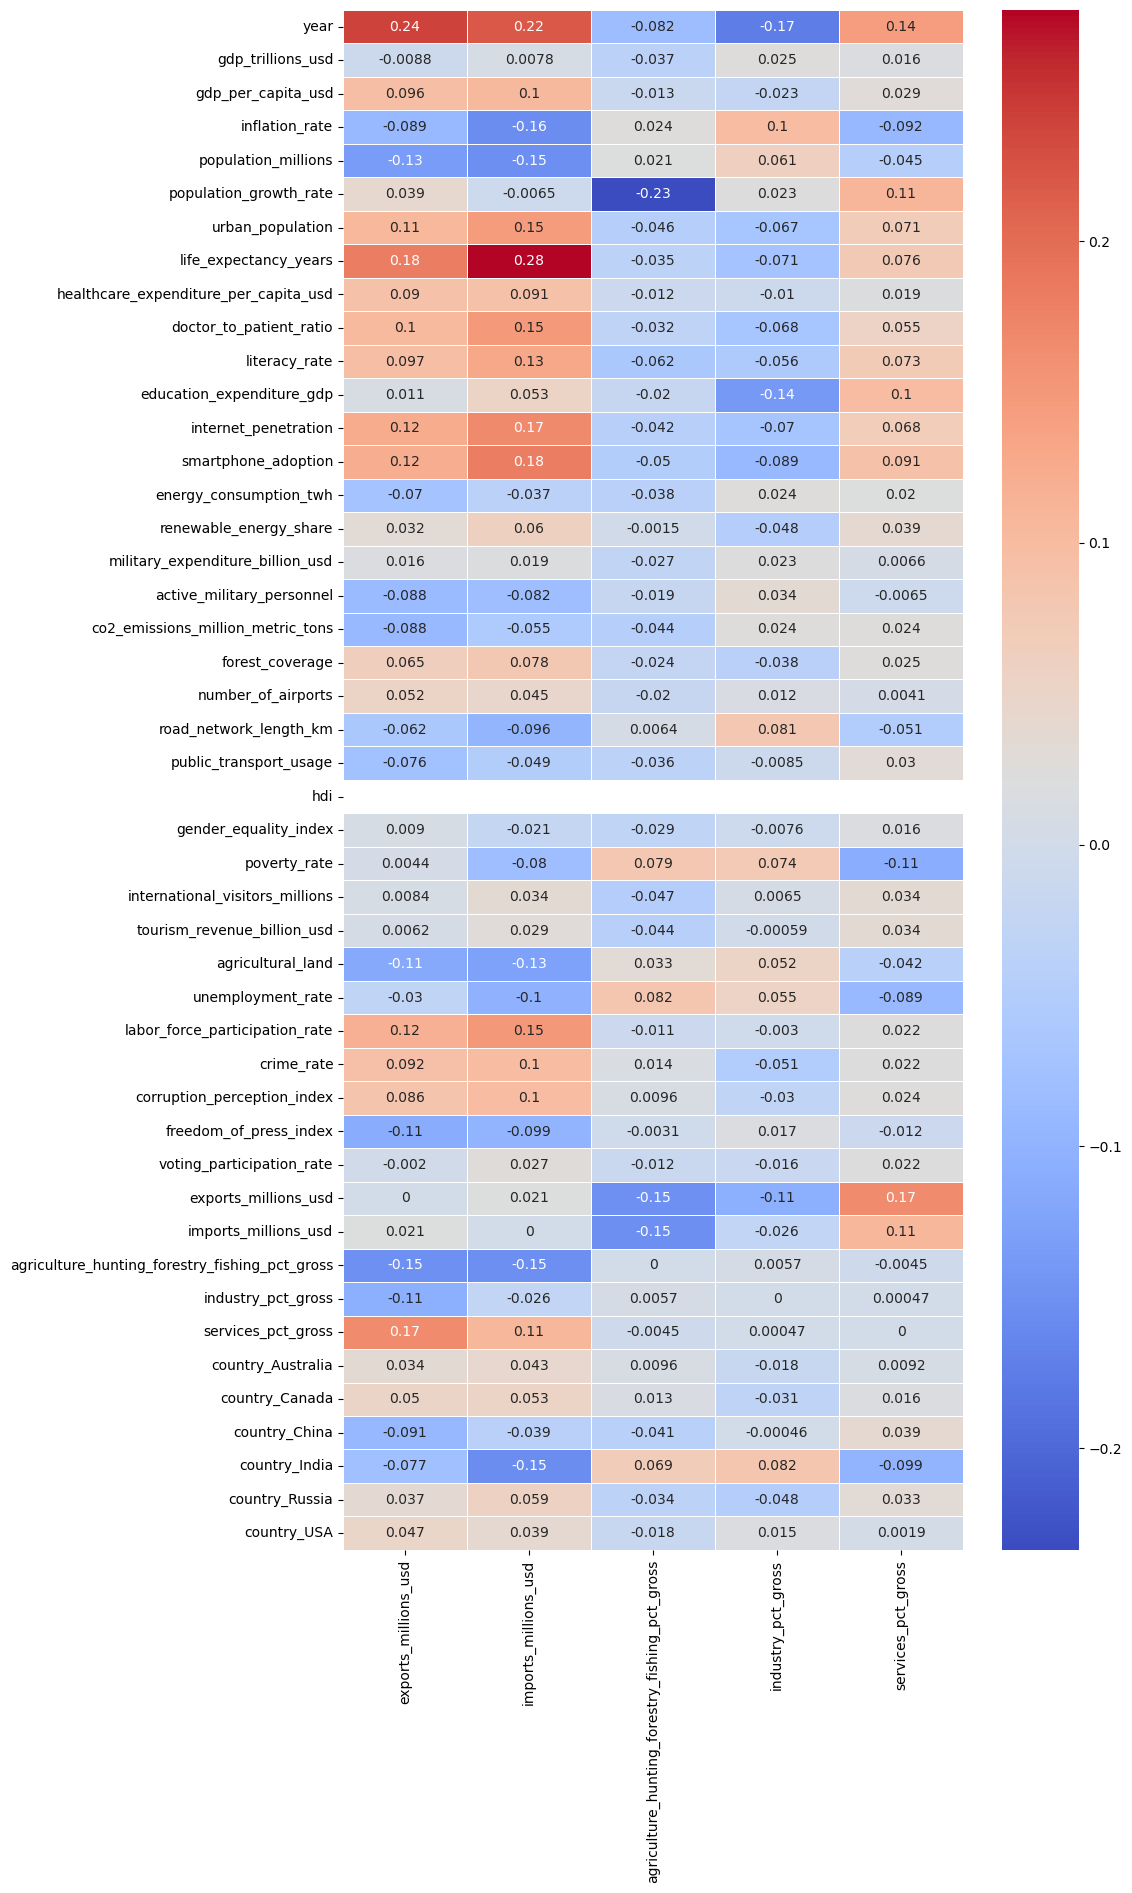

In [302]:
plt.figure(figsize=(10,20))
corr_diff_knn = corr_data_original - corr_data_knn
sns.heatmap(corr_diff_knn, annot=True, cmap='coolwarm', linewidths=0.5)

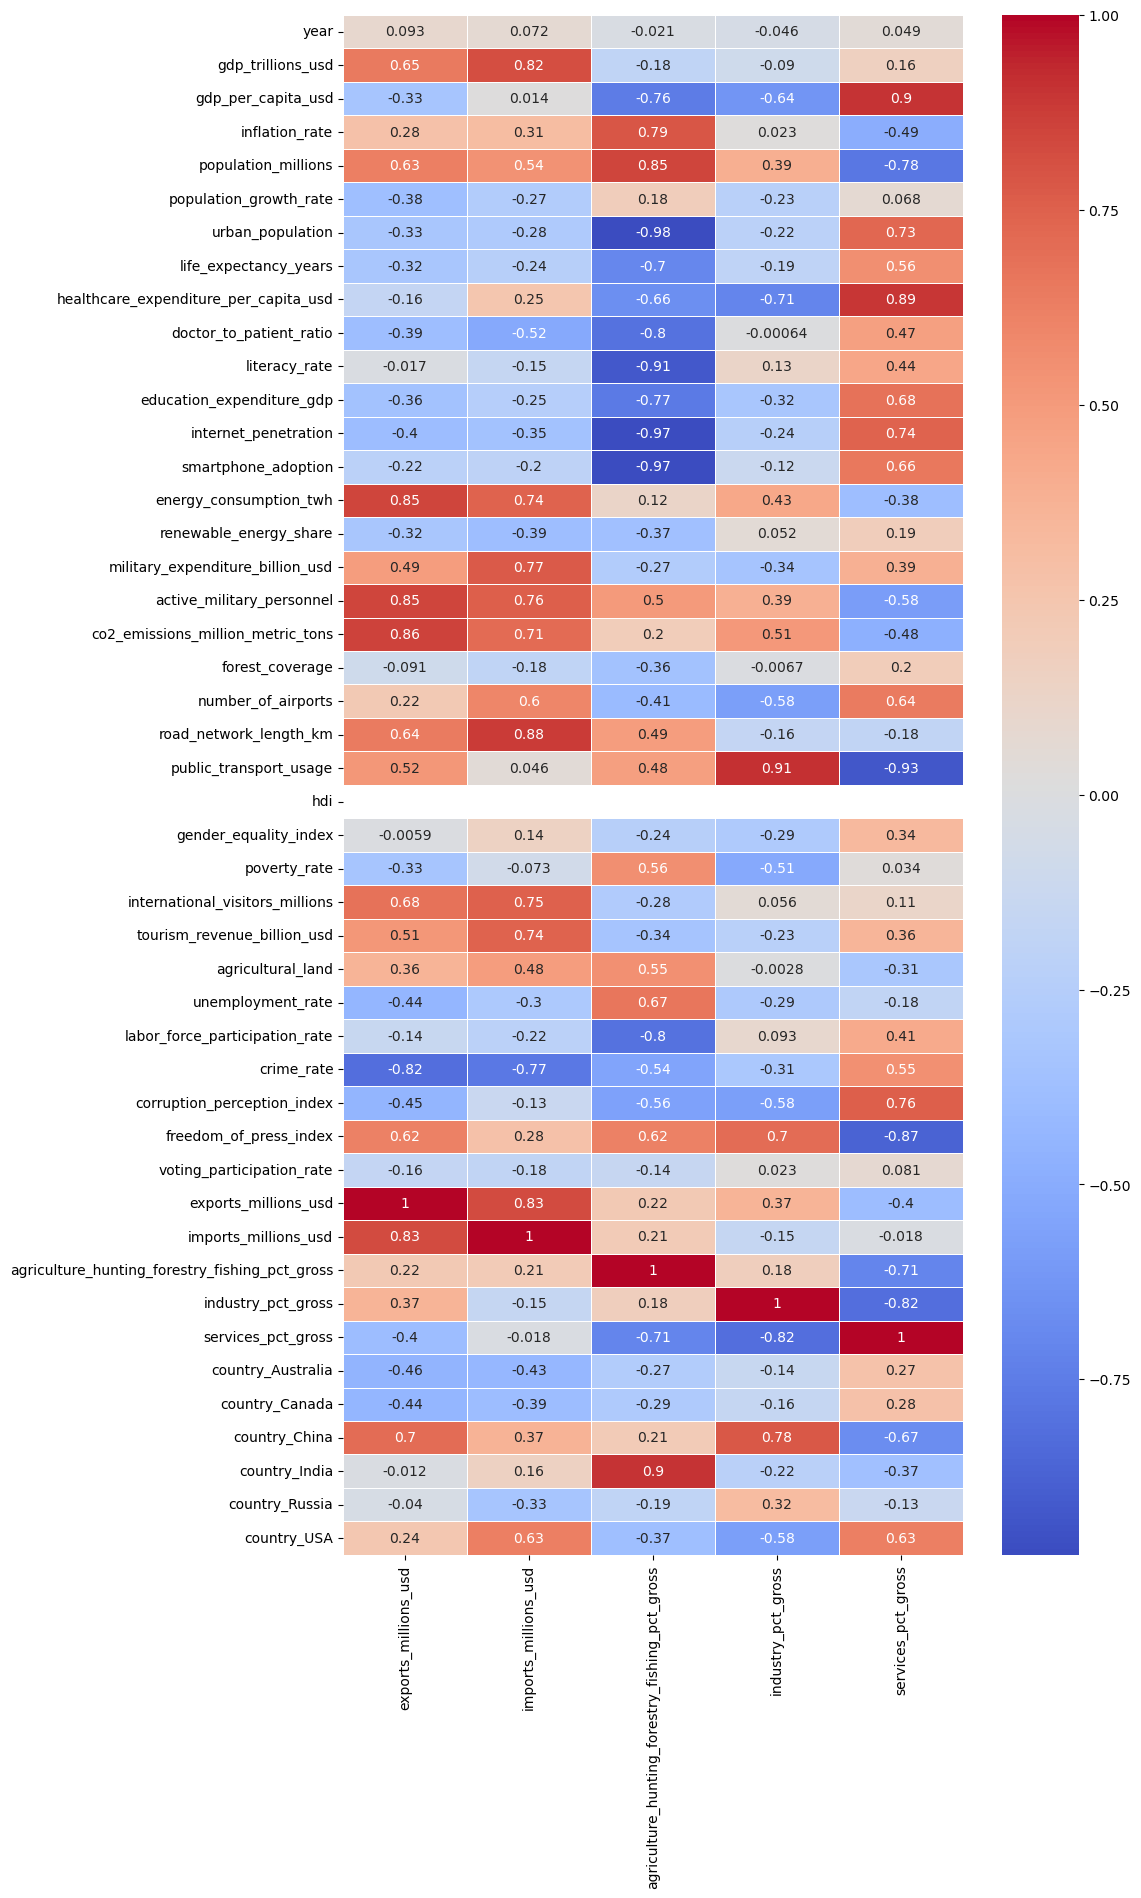

In [245]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the imputer
imputer = IterativeImputer(max_iter = 50)

# Apply imputation
df_imputed_mice = pd.DataFrame(imputer.fit_transform(temp_df), columns=temp_df.columns)

corr_data_mice = corr_plot(df_imputed_mice)

<Axes: >

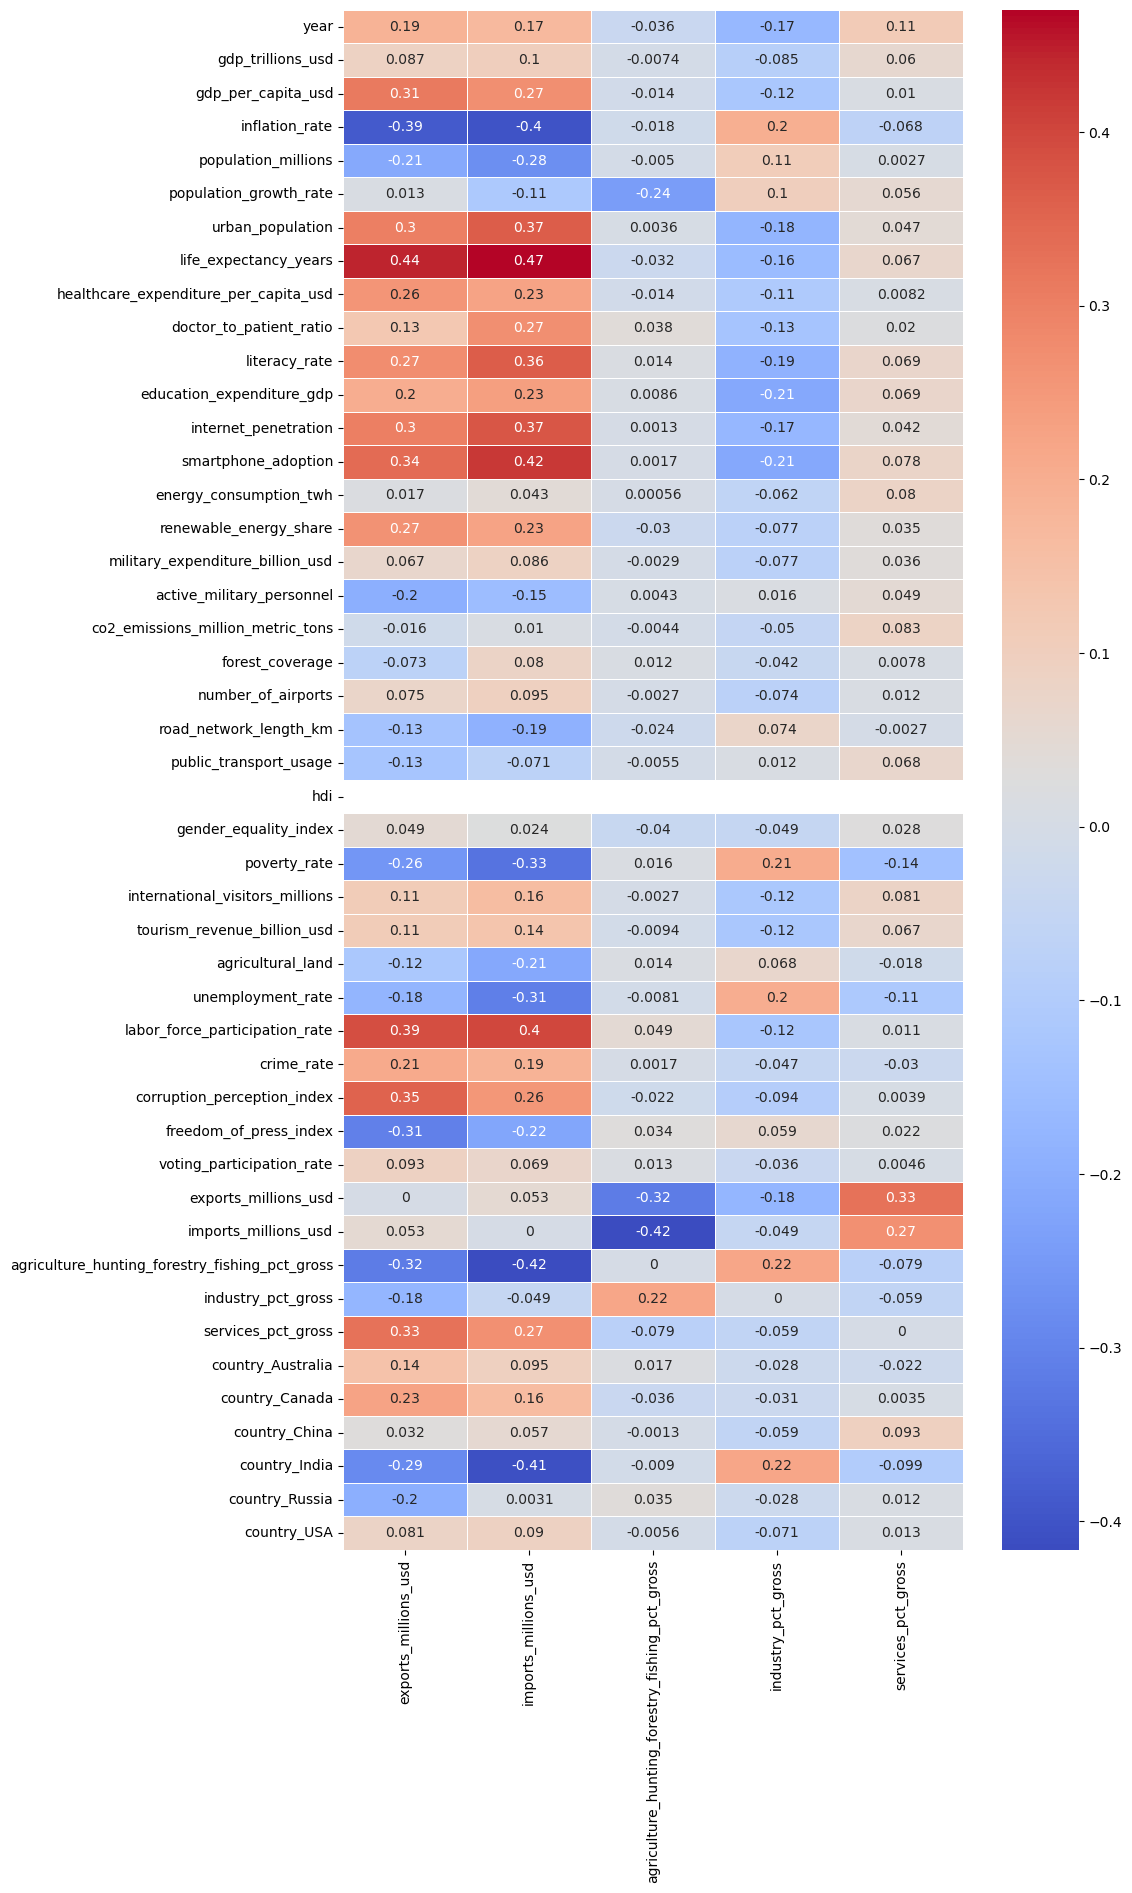

In [267]:
corr_diff_mice = corr_data_original - corr_data_mice
plt.figure(figsize=(10,20))
sns.heatmap(corr_diff_mice, annot=True, cmap='coolwarm', linewidths=0.5)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_49128\612474676.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_imputed = temp_df.fillna(method='ffill')
C:\Users\vaibh\AppData\Local\Temp\ipykernel_49128\612474676.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_imputed = temp_df.fillna(method='bfill')


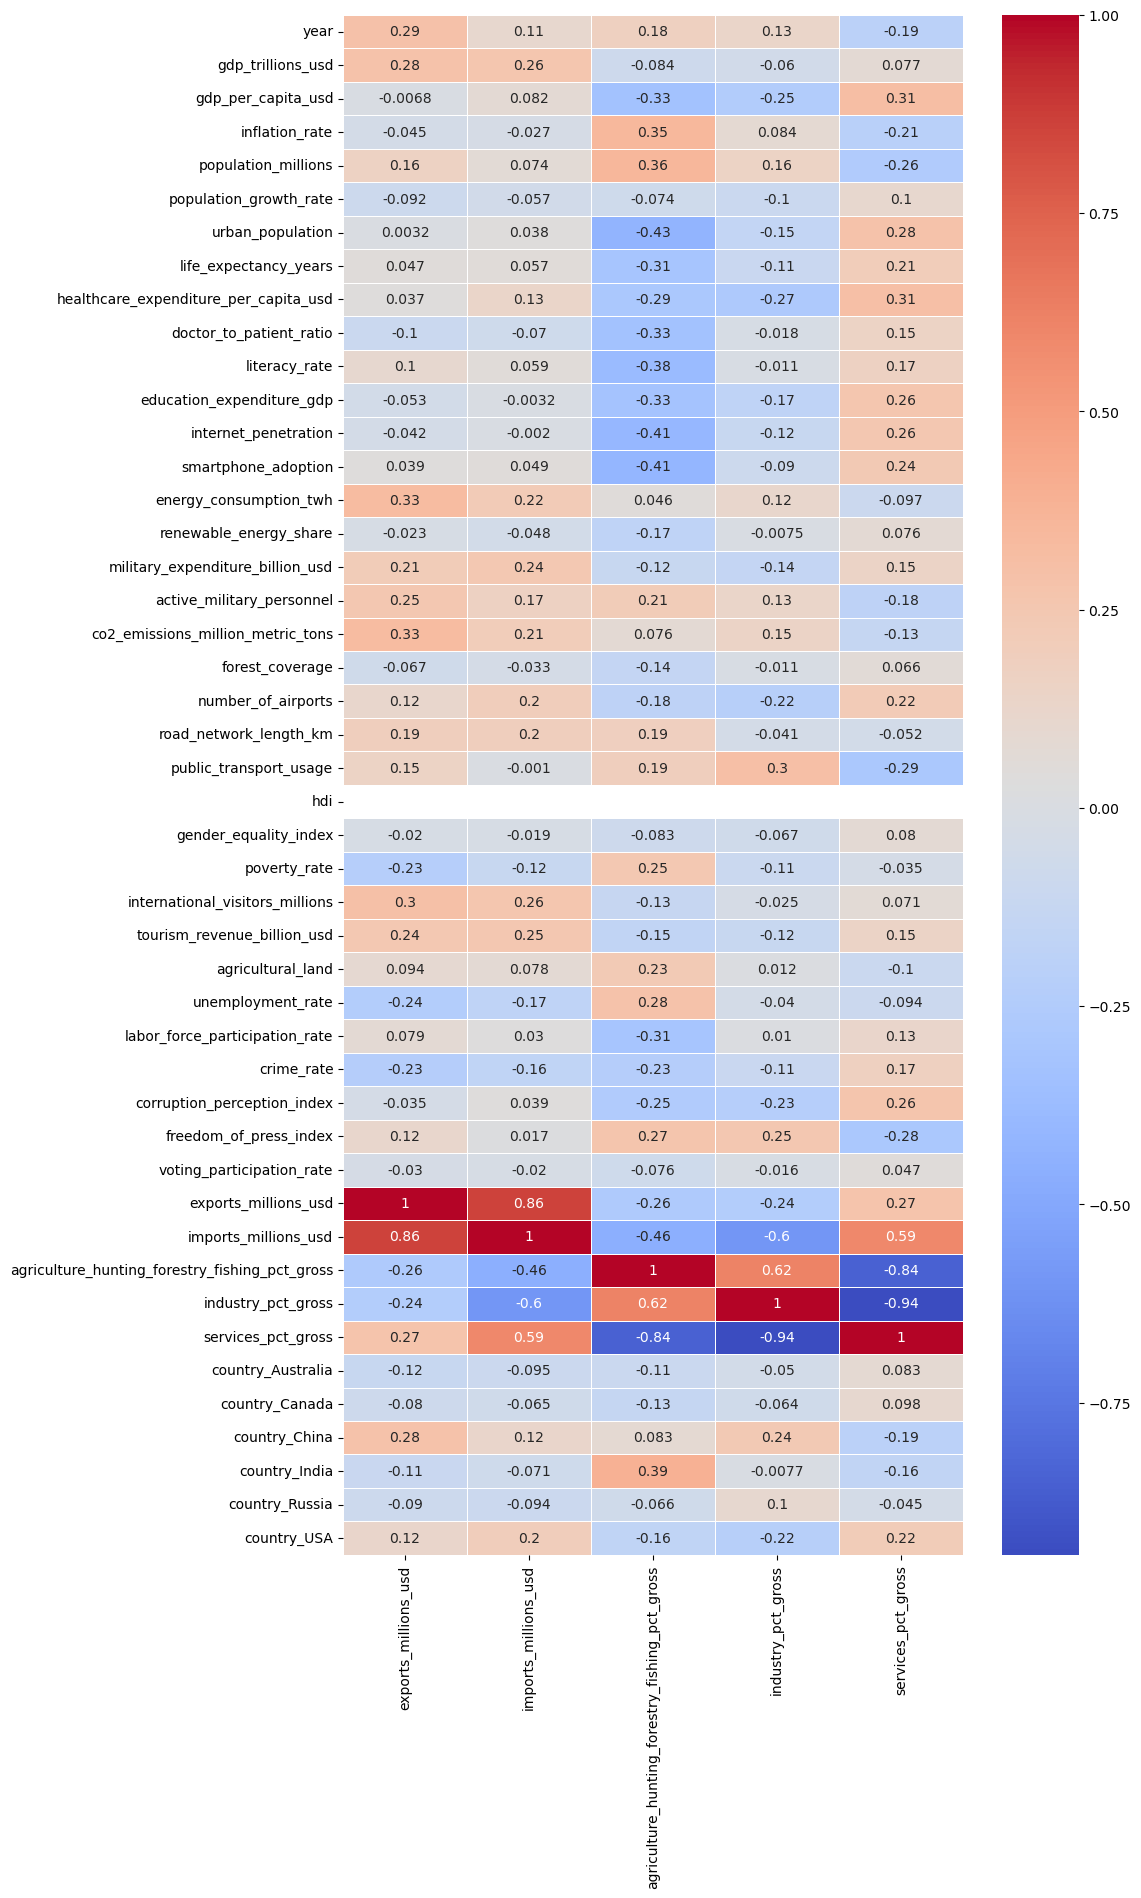

In [263]:
# Forward fill
df_ffill_imputed = temp_df.fillna(method='ffill')

# Backward fill
df_bfill_imputed = temp_df.fillna(method='bfill')

corr_data_bfill = corr_plot(df_bfill_imputed)

<Axes: >

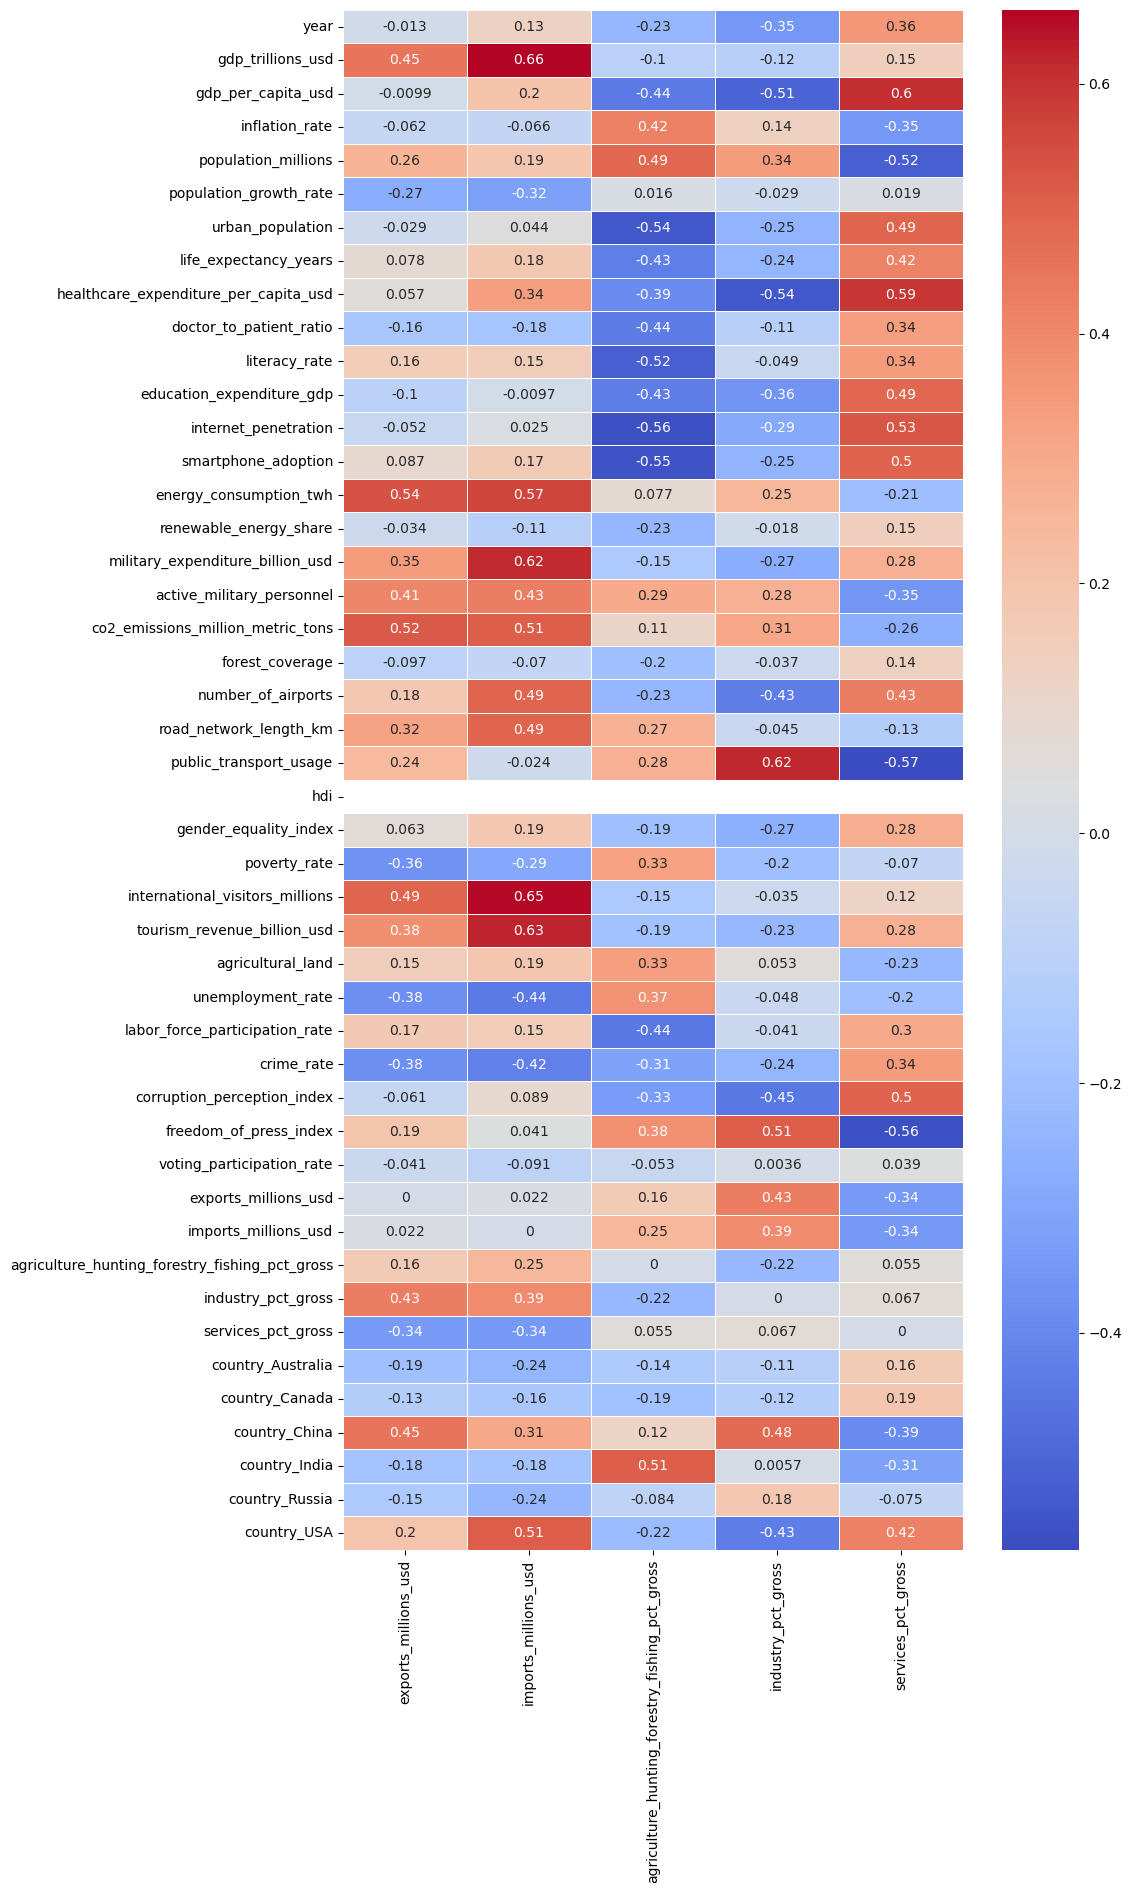

In [269]:
corr_diff_bfill = corr_data_original - corr_data_bfill
plt.figure(figsize=(10,20))
sns.heatmap(corr_diff_bfill, annot=True, cmap='coolwarm', linewidths=0.5)

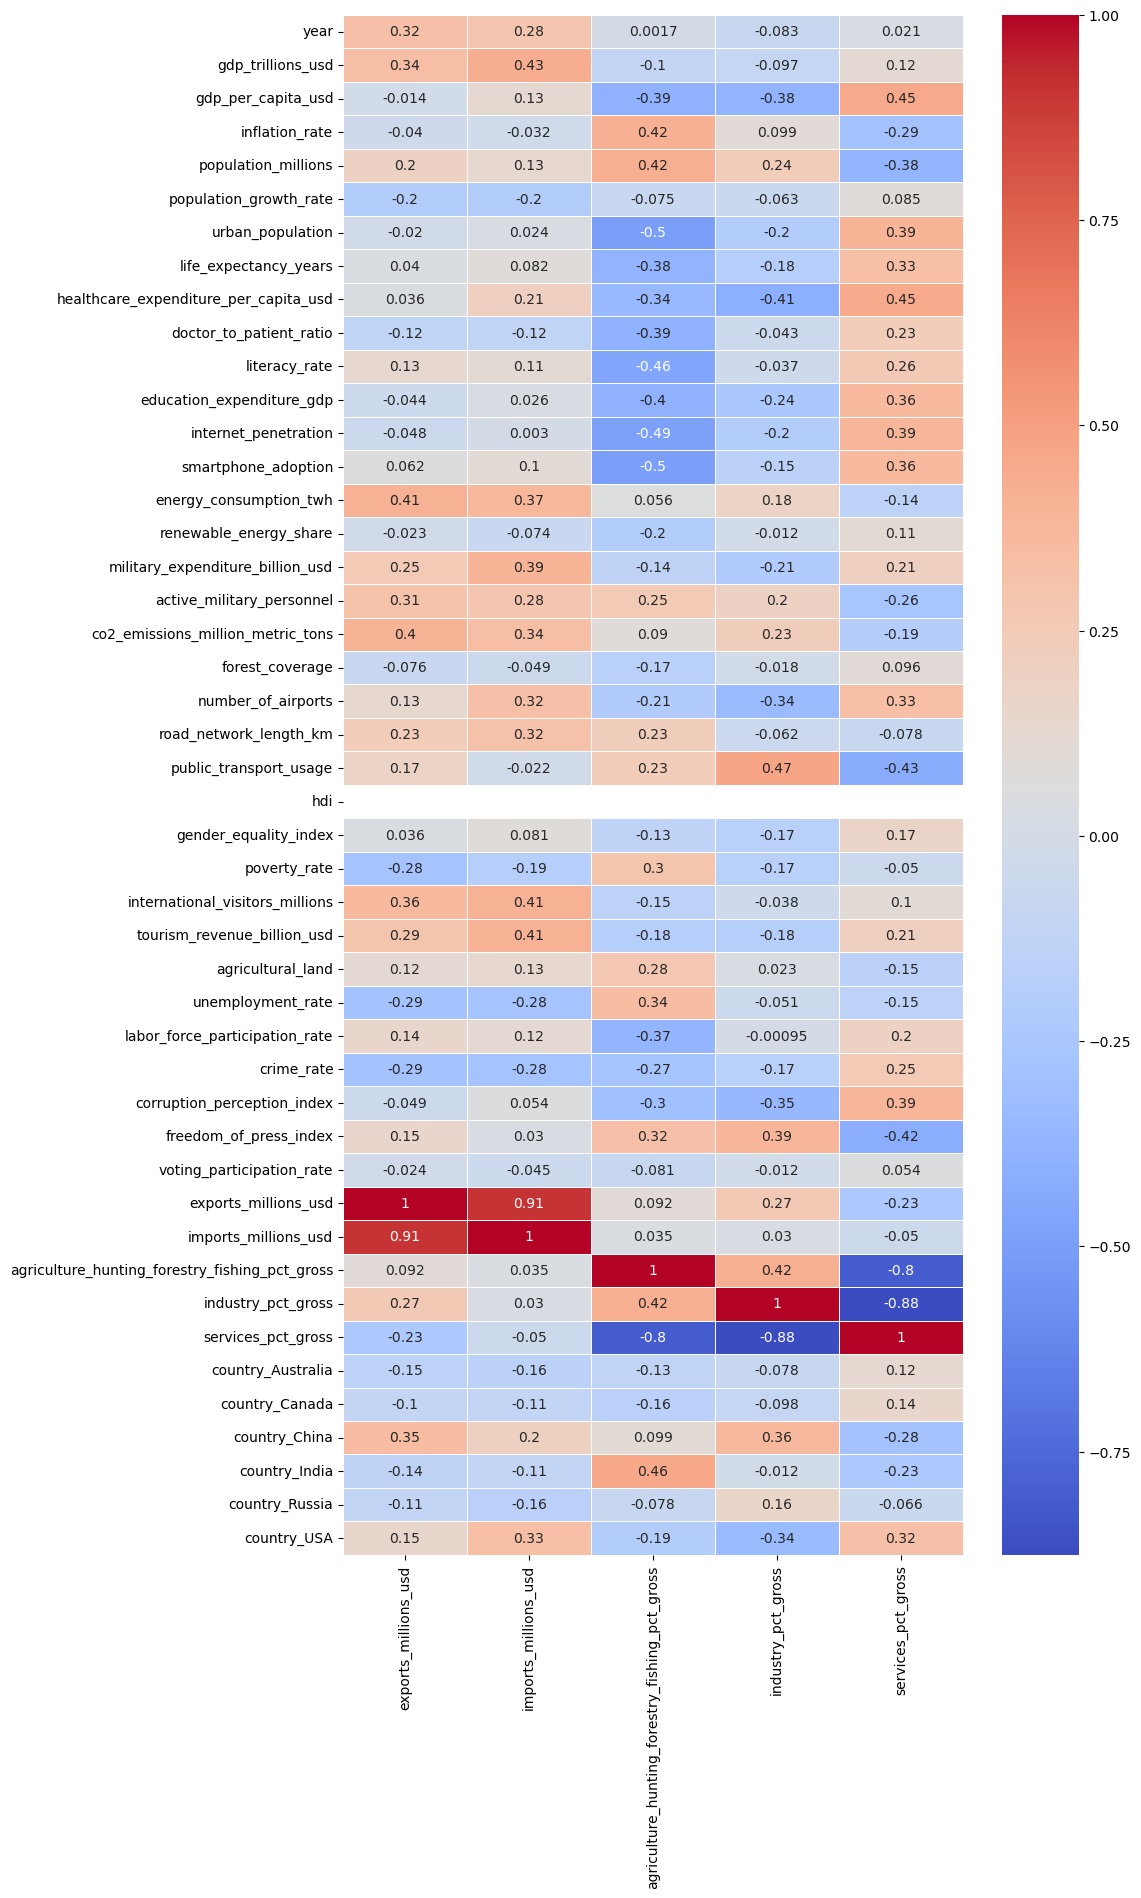

In [265]:
corr_data_ffill = corr_plot(df_ffill_imputed)

<Axes: >

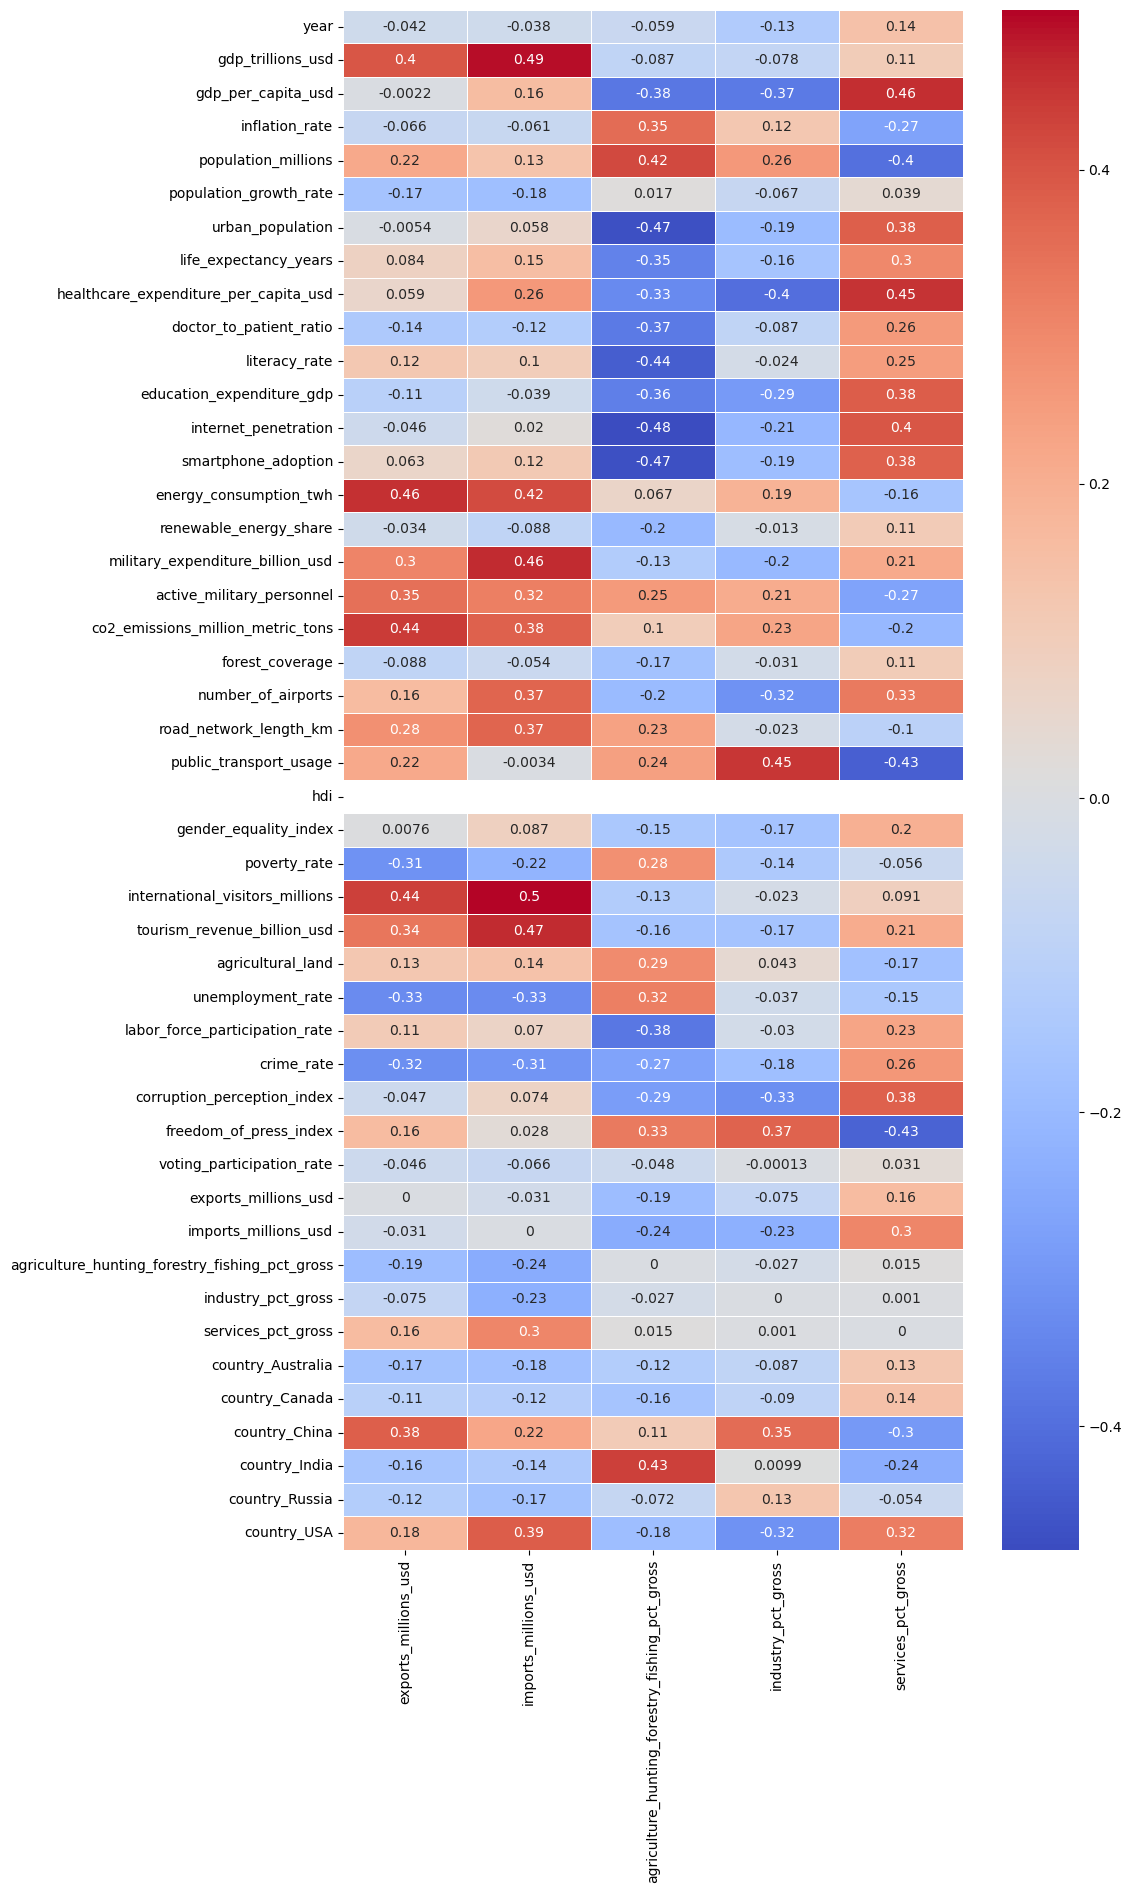

In [271]:
corr_diff_ffill = corr_data_original - corr_data_ffill
plt.figure(figsize=(10,20))
sns.heatmap(corr_diff_ffill, annot=True, cmap='coolwarm', linewidths=0.5)

Of all the imputations, I found that KNN did the best for my problem

After trying various combinations of the neighbors and strategies and metrics, the default 5 neighbor did the best

In [305]:
df_imputed_knn

year  gdp_trillions_usd  gdp_per_capita_usd  inflation_rate  \
0    2000.0              20.87             65455.0            2.28   
1    2000.0               1.64             10923.0            3.25   
2    2000.0               1.65             47932.0            1.96   
3    2000.0              13.64             10060.0            2.43   
4    2000.0               2.98              2102.1            4.87   
..      ...                ...                 ...             ...   
139  2023.0               1.64             10978.0            3.20   
140  2023.0               1.73             44804.0            1.88   
141  2023.0              13.72              9870.0            2.29   
142  2023.0               2.79              2070.6            4.70   
143  2023.0               1.27             51304.0            1.54   

     population_millions  population_growth_rate  urban_population  \
0                 330.34                    0.58             83.42   
1                 141.81                    0.10             72.67   
2                  36.63                    0.90             79.54   
3                1446.93                    0.31             58.56   
4                1313.76                    1.04             34.09   
..                   ...                     ...               ...   
139               138.04                    0.10             71.56   
140                35.59                    0.93             83.11   
141              1407.79                    0.29             61.86   
142              1411.74                    1.03             34.05   
143                24.38                    1.36             84.37   

     life_expectancy_years  healthcare_expenditure_per_capita_usd  \
0                    78.39                               11209.00   
1                    69.91                                 534.45   
2                    84.60                                5113.50   
3                    76.09                                 459.00   
4                    68.78                                  76.07   
..                     ...                                    ...   
139                  73.47                                 539.70   
140                  79.17                                5139.75   
141                  73.10                                 430.20   
142                  70.09                                  76.07   
143                  83.40                                5434.00   

     doctor_to_patient_ratio  ...  imports_millions_usd  \
0                       2.60  ...             2270472.8   
1                       4.05  ...              210739.6   
2                       2.84  ...              437106.4   
3                       1.86  ...             2109099.0   
4                       0.86  ...              440511.0   
..                       ...  ...                   ...   
139                     4.14  ...              210739.6   
140                     2.78  ...              419867.2   
141                     1.81  ...             1697890.0   
142                     0.93  ...              436920.8   
143                     3.53  ...              221286.8   

     agriculture_hunting_forestry_fishing_pct_gross  industry_pct_gross  \
0                                              0.88               18.58   
1                                              4.24               35.74   
2                                              1.90               27.20   
3                                              8.34               40.76   
4                                             18.76               28.94   
..                                              ...                 ...   
139                                            4.24               35.74   
140                                            1.90               27.20   
141                                            9.26               42.48   
142                                  

In [325]:
working_df = df_imputed_knn.copy()

working_df['country'] = working_df.iloc[:,-6:].idxmax(axis=1)
working_df['country'] = working_df['country'].str.split('_').str[1]

In [329]:
working_df.to_csv('working_df.csv', index=False)

In [331]:
for i in working_df.columns:
    print(i)

year
gdp_trillions_usd
gdp_per_capita_usd
inflation_rate
population_millions
population_growth_rate
urban_population
life_expectancy_years
healthcare_expenditure_per_capita_usd
doctor_to_patient_ratio
literacy_rate
education_expenditure_gdp
internet_penetration
smartphone_adoption
energy_consumption_twh
renewable_energy_share
military_expenditure_billion_usd
active_military_personnel
co2_emissions_million_metric_tons
forest_coverage
number_of_airports
road_network_length_km
public_transport_usage
hdi
gender_equality_index
poverty_rate
international_visitors_millions
tourism_revenue_billion_usd
agricultural_land
unemployment_rate
labor_force_participation_rate
crime_rate
corruption_perception_index
freedom_of_press_index
voting_participation_rate
exports_millions_usd
imports_millions_usd
agriculture_hunting_forestry_fishing_pct_gross
industry_pct_gross
services_pct_gross
country_Australia
country_Canada
country_China
country_India
country_Russia
country_USA
country
